In [1]:
import pandas as pd
data = pd.read_csv('../data/raw_postpro.csv', encoding = 'cp949')
# 컬럼 삭제
df = data.drop(['Part No.2', '미입고 기간', '선박입고','완료 여부'], axis=1)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
y = df['key2']
le = preprocessing.LabelEncoder()
y = y.values.ravel()  # y를 1차원 배열로 변환
y = le.fit_transform(y)

In [3]:
from sklearn import preprocessing
label_encoders = {}  # 각 열에 대한 LabelEncoder를 저장하기 위한 딕셔너리
columns_to_encode = ["Subject",'Machinery', 'Assembly' , "Part No.1","청구품목", 'key2']  # 인코딩을 수행할 열의 이름 리스트

for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    label_encoders[column] = le # 딕셔너리에 저장
    df[column+"_encoded"] = le.transform(df[column]) # 새로운 encoding 된 컬럼 추가

In [4]:
# 인코딩된 컬럼을 사용
encoded_columns = ['Subject_encoded','Machinery_encoded', 'Assembly_encoded', 'Part No.1_encoded', '청구품목_encoded']
X = df[encoded_columns].values
y = df['key2_encoded'].values

# encoding 안쓰고

In [42]:
X = df[['Subject','Machinery', 'Assembly', 'Part No.1', '청구품목']]
y = df['key2'].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# y = y.values.ravel()  # y를 1차원 배열로 변환
y = le.fit_transform(y)

In [385]:
# X,y

In [43]:
# 데이터를 학습용과 검증용으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [44]:
# df에서 각 컬럼의 단어 수 확인
colname = ['Subject','Machinery', 'Assembly', 'Part No.1', '청구품목',]
count = []
for col in colname:
    unique_subjects = set(df[col])
    num_unique_subjects = len(unique_subjects)
    count.append(num_unique_subjects)
    # print(num_unique_subjects)
print(count)

import pandas as pd

# 가장 긴 문자열 길이를 저장할 딕셔너리 초기화
max_string_lengths = {}

# 각 열 별로 길이가 가장 긴 문자열 찾기
for col in colname:
    max_length = df[col].str.len().max()
    max_string_lengths[col] = max_length
# 결과 출력
print(max_string_lengths)


[1716, 174, 1683, 8128, 6129]
{'Subject': 68, 'Machinery': 37, 'Assembly': 87, 'Part No.1': 43, '청구품목': 120}


In [45]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 가정 : 'df'는 데이터 프레임, colname은 토큰화할 문자열을 포함하는 열 이름 리스트입니다
colname = ['Subject', 'Machinery','Assembly', 'Part No.1', '청구품목']

# 정수 시퀀스 및 패딩 처리된 데이터를 저장할 딕셔너리 초기화
encoded_columns = {}

# 토크나이저 인스턴스 생성
tokenizer = Tokenizer(char_level=True, lower=False)  # 문자 레벨로 토큰화합니다

# 각 열별 토큰화, 정수 시퀀스 변환 및 패딩 처리
for col in colname:
    # 토큰화
    tokenizer.fit_on_texts(X[col])

    # 정수 시퀀스 변환을위한 수정된 코드
    sequences = tokenizer.texts_to_sequences(df[col])

    # 패딩 처리: "maxlen"을 사용하여 최대 시퀀스 길이를 지정하거나 DataFrame에서 구한 값 사용
    padded = pad_sequences(sequences, maxlen=max_string_lengths[col], padding='post')

    print(max_string_lengths[col])
    # 결과 저장
    encoded_columns[col] = padded

# 전처리된 열 출력
print(encoded_columns)

68
37
87
43
120
{'Subject': array([[ 7, 12, 63, ...,  0,  0,  0],
       [66, 65, 52, ...,  0,  0,  0],
       [66, 65, 52, ...,  0,  0,  0],
       ...,
       [ 2, 24, 10, ...,  0,  0,  0],
       [21, 24, 12, ...,  0,  0,  0],
       [21, 24, 12, ...,  0,  0,  0]]), 'Machinery': array([[ 3,  6, 21, ...,  0,  0,  0],
       [ 3,  6, 21, ...,  0,  0,  0],
       [ 3,  6, 21, ...,  0,  0,  0],
       ...,
       [36, 15,  1, ...,  0,  0,  0],
       [32, 15,  1, ...,  0,  0,  0],
       [32, 15,  1, ...,  0,  0,  0]]), 'Assembly': array([[25, 19, 25, ...,  0,  0,  0],
       [ 9,  5, 11, ...,  0,  0,  0],
       [19, 35, 32, ...,  0,  0,  0],
       ...,
       [ 2, 17,  2, ...,  0,  0,  0],
       [20,  5,  3, ...,  0,  0,  0],
       [20,  5,  3, ...,  0,  0,  0]]), 'Part No.1': array([[ 29,  22,   7, ...,   0,   0,   0],
       [ 29,  22,   7, ...,   0,   0,   0],
       [ 29,  22,   7, ...,   0,   0,   0],
       ...,
       [171,  18,   7, ...,   0,   0,   0],
       [171,  24,   

In [49]:
for col in colname:
    print(encoded_columns[col].shape)

(20517, 68)
(20517, 37)
(20517, 87)
(20517, 43)
(20517, 120)


In [50]:
# 임베딩된 데이터를 X와 y로 분할
X = {
    'Subject': encoded_columns['Subject'],
    'Machinery': encoded_columns['Machinery'],
    'Assembly': encoded_columns['Assembly'],
    'Part No.1': encoded_columns['Part No.1'],
    '청구품목': encoded_columns['청구품목']
}
# train set과 test set으로 분할
X_train = {}
X_test = {}
for col in X:
    X_train[col], X_test[col], y_train, y_test = train_test_split(X[col], y, test_size=0.2, random_state=42)

In [63]:
for col in colname:
    print(X_train[col].shape)
for col in colname:
    print(X_test[col].shape)
# y_train.shape, y_test.shape
X_train['Subject'].shape

(16413, 68)
(16413, 37)
(16413, 87)
(16413, 43)
(16413, 120)
(4104, 68)
(4104, 37)
(4104, 87)
(4104, 43)
(4104, 120)


(16413, 68)

In [67]:
colname = ['Subject', 'Machinery','Assembly', 'Part No.1', '청구품목']
for col in colname: 
    print(X_train[col].shape)
for col in colname: 
    print(X_test[col].shape)

(16413, 68)
(16413, 37)
(16413, 87)
(16413, 43)
(16413, 120)
(4104, 68)
(4104, 37)
(4104, 87)
(4104, 43)
(4104, 120)


In [68]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Dense, concatenate, Flatten, Conv1D, GlobalMaxPooling1D, LSTM, Reshape, Flatten

# embedding_input_dim_1 = encoded_columns['Subject'].shape[1]  # Subject 열에 대한 임베딩 입력 차원
# embedding_input_dim_2 = encoded_columns['Machinery'].shape[1] 
# embedding_input_dim_3 = encoded_columns['Assembly'].shape[1]  
# embedding_input_dim_4 = encoded_columns['Part No.1'].shape[1]
# embedding_input_dim_5 = encoded_columns['청구품목'].shape[1] 

embedding_input_dim_1 = 68  # Subject 열에 대한 임베딩 입력 차원
embedding_input_dim_2 = 37
embedding_input_dim_3 = 87  
embedding_input_dim_4 = 56
embedding_input_dim_5 = 120

# 입력 레이어 정의
input1 = Input(shape=(68,), name="Subject_Input")
input2 = Input(shape=(37,), name="Machinery_Input")
input3 = Input(shape=(87,), name="Assembly_Input")
input4 = Input(shape=(56,), name="PartNo1_Input")
input5 = Input(shape=(120,), name="Item_Input")

# 임베딩 레이어 정의
embedding_dim = 100  # 임베딩 차원

embedding1 = Embedding(embedding_input_dim_1, embedding_dim, name="Subject_Embedding")(input1)
embedding2 = Embedding(embedding_input_dim_2, embedding_dim, name="Machinery_Embedding")(input2)
embedding3 = Embedding(embedding_input_dim_3, embedding_dim, name="Assembly_Embedding")(input3)
embedding4 = Embedding(embedding_input_dim_4, embedding_dim, name="PartNo1_Embedding")(input4)
embedding5 = Embedding(embedding_input_dim_5, embedding_dim, name="Item_Embedding")(input5)

# 임베딩된 데이터 플래튼
flatten1 = Flatten()(embedding1)
flatten2 = Flatten()(embedding2)
flatten3 = Flatten()(embedding3)
flatten4 = Flatten()(embedding4)
flatten5 = Flatten()(embedding5)

In [69]:
# 모든 임베딩된 데이터 연결
concatenated = concatenate([flatten1, flatten2, flatten3, flatten4, flatten5])

# 완전 연결 레이어 추가
dense1 = Dense(64, activation='relu')(concatenated)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(61, activation='softmax')(dense2) # 클래스 갯수 61

# 모델 생성
model = Model(inputs=[input1, input2, input3, input4, input5], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Subject_Input (InputLayer)     [(None, 68)]         0           []                               
                                                                                                  
 Machinery_Input (InputLayer)   [(None, 37)]         0           []                               
                                                                                                  
 Assembly_Input (InputLayer)    [(None, 87)]         0           []                               
                                                                                                  
 PartNo1_Input (InputLayer)     [(None, 56)]         0           []                               
                                                                                            

In [70]:
# 모델 훈련
model.fit(
    [X_train['Subject'], X_train['Machinery'], X_train['Assembly'], X_train['Part No.1'], X_train['청구품목']],
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(
        [X_test['Subject'], X_test['Machinery'], X_test['Assembly'], X_test['Part No.1'], X_test['청구품목']],
        y_test
    )
)

Epoch 1/10


ValueError: in user code:

    File "D:\ShipSupplies\DA\venv\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "D:\ShipSupplies\DA\venv\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ShipSupplies\DA\venv\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "D:\ShipSupplies\DA\venv\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "D:\ShipSupplies\DA\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\ShipSupplies\DA\venv\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 3 of layer "model_7" is incompatible with the layer: expected shape=(None, 56), found shape=(None, 43)


In [362]:
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_train.shape)
# print("y_test shape:", y_train.shape)

In [373]:
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Dense, concatenate, Flatten, Conv1D, GlobalMaxPooling1D, LSTM, Reshape, Flatten

# 출력 통합
merged_output = concatenate([embedding1, embedding2, embedding3, embedding4, embedding5], axis=-1)

# flatten_layer = Flatten()(merged_output)

# CNN 레이어
reshape_layer = Reshape((sequence_length, embedding_dim * 5))(merged_output)
cnn_output = Conv1D(filters=128, kernel_size=1, activation="relu")(reshape_layer)
cnn_output = GlobalMaxPooling1D()(cnn_output)

# CNN Layer
# cnn_output = Conv1D(filters=128, kernel_size=1, activation='relu')(merged_output)  # kernel_size 수정
# cnn_output = Conv1D(filters=128, kernel_size=1)(cnn_output)
# cnn_output = Dropout(0.05)(cnn_output) # 편향 추가
# cnn_output = GlobalMaxPooling1D()(cnn_output)

# LSTM Layer
lstm_output = LSTM(128)(merged_output)

# Dense Layer
dense_input = concatenate([cnn_output, lstm_output], axis=-1)
dense_output = Dense(64, activation='relu', name='Dense_output')(dense_input)

prediction = Dense(61, activation='softmax', name="Prediction_output")(dense_output)

# 모델 생성
model2 = Model(inputs=[input1, input2, input3, input4, input5], outputs=prediction)

In [364]:
# from sklearn.utils import class_weight

# # 클래스 가중치 계산
# class_weights = class_weight.compute_class_weight(class_weight = "balanced",
#                                                  classes = np.unique(y_train),
#                                                   y= y_train)

In [374]:
from tensorflow.keras.optimizers import Adam
# 모델 컴파일
learning_rate = 0.001  # 원하는 학습률 값 설정하기
optimizer = Adam(learning_rate=learning_rate)
# 모델 컴파일
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Subject_Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Assembly_Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Resource_Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Method_Input (InputLayer)      [(None, 1)]          0           []                               
                                                                                           

In [366]:
# from tensorflow.keras.utils import to_categorical
# y_train_categorical = to_categorical(y_train, num_classes=61)
# y_test_categorical = to_categorical(y_test, num_classes=61)

In [375]:
from sklearn import preprocessing

encoder1 = preprocessing.LabelEncoder()
X_encoded1 = encoder1.fit_transform(X.iloc[:, 0].values)
X_train_encoded1 = encoder1.transform(X_train.iloc[:, 0].values)

encoder2 = preprocessing.LabelEncoder()
X_encoded2 = encoder2.fit_transform(X.iloc[:, 1].values)
X_train_encoded2 = encoder2.transform(X_train.iloc[:, 1].values)

encoder3 = preprocessing.LabelEncoder()
X_encoded3 = encoder3.fit_transform(X.iloc[:, 2].values)
X_train_encoded3 = encoder3.transform(X_train.iloc[:, 2].values)

encoder4 = preprocessing.LabelEncoder()
X_encoded4 = encoder4.fit_transform(X.iloc[:, 3].values)
X_train_encoded4 = encoder4.transform(X_train.iloc[:, 3].values)

encoder5 = preprocessing.LabelEncoder()
X_encoded5 = encoder5.fit_transform(X.iloc[:, 4].values)
X_train_encoded5 = encoder5.transform(X_train.iloc[:, 4].values)

In [380]:
X_train_encoded1.shape

(14361,)

In [376]:
# y_train,y_test
X_test_encoded1 = encoder1.transform(X_test.iloc[:, 0].values)
X_test_encoded2 = encoder2.transform(X_test.iloc[:, 1].values)
X_test_encoded3 = encoder3.transform(X_test.iloc[:, 2].values)
X_test_encoded4 = encoder4.transform(X_test.iloc[:, 3].values)
X_test_encoded5 = encoder5.transform(X_test.iloc[:, 4].values)

Epoch 1/50
113/113 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 3.9316 - val_accuracy: 0.7045
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 4.0151 - val_accuracy: 0.7022
Epoch 3/50
113/113 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 4.0506 - val_accuracy: 0.7055
Epoch 4/50
113/113 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 4.0793 - val_accuracy: 0.7037
Epoch 5/50
113/113 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 4.1746 - val_accuracy: 0.7039
Epoch 6/50
113/113 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 4.2070 - val_accuracy: 0.7032
Epoch 7/50
113/113 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 4.2765 - val_accuracy: 0.7021
Epoch 

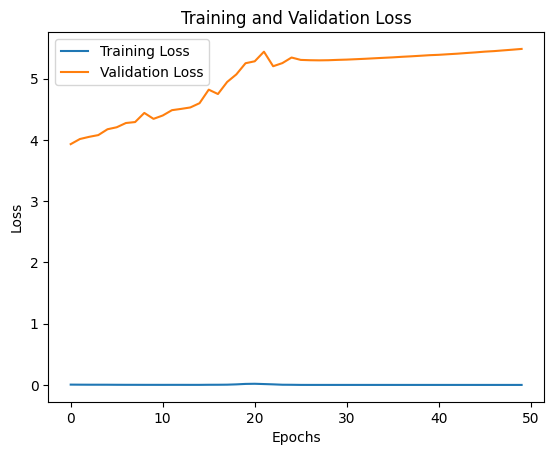

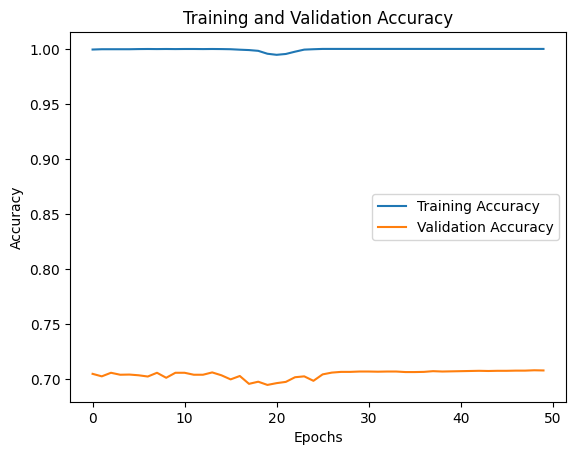

In [378]:
import matplotlib.pyplot as plt

# 훈련을 fit 메소드에 적용하고 결과를 history 변수에 저장합니다.
history = model2.fit(
    [X_train_encoded1, X_train_encoded2, X_train_encoded3, X_train_encoded4, X_train_encoded5],
    y_train,
    epochs=50,
    batch_size=128,
    validation_data=([X_test_encoded1, X_test_encoded2, X_test_encoded3, X_test_encoded4, X_test_encoded5], y_test),
)


# 손실 및 정확도 값을 얻습니다.
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# 손실 시각화
plt.figure()
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 시각화
plt.figure()
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [160]:
model2.fit(
    [X_train_encoded1, X_train_encoded2, X_train_encoded3, X_train_encoded4, X_train_encoded5],
    y_train, epochs=20, batch_size=64)

In [161]:
X_test

,Subject,Machinery,Assembly,Part No.1,청구품목
1493,TER-F-ENG-190120-03 (SKIFF BOAT ENGINE PARTS),SKIFF BOAT ENGINE,"MANIFOLD, WATER",3055710,"TUBE, WATER BYPASS"
8503,"HAN-E-200901-01, HYD REPAIR PART",PURSE WINCH,WINCH ASSY,17.100.00907.000,LINK
7408,"SEG-190522-01, TOPPING WINCH, REPAIR PART",PORT BOOM TOPPING WINCH,WINCH ASSY,13.110.43089.000,SEAL
3509,신조2차선 출항시 AUX ENGINE(CAT 3512C) 예비품 발주의 건,NO.1 GENERATOR ENGINE,8N-6152 PUMP GP-ENG OIL,0R-3230,PUMP GP-ENG OIL REMAN
5927,"DEO-E-210422-01, 상가시 사용품목",HYD. DRIVE ENGINE,2W-8065 LINES GP-F INJ,127-2176,LINE AS-FUEL INJECTION
...,...,...,...,...,...
4812,BLO-F-ENG-200706-07,ENGINE CONTROL SYSTEM,PANEL ASSEMBLY-PNEUMATIC BRAKE WITH SPEED BOOST,11-042-003,"REGULATOR-1/2, PILOT OPERATED, LESS GAGE"
2126,ELS-F-ENG-200720-01 M/E PARTS,MAIN ENGINE,RAW WATER PUMP,8476005,GASKET KIT-PP
16221,신조2차선 출항시 AUX ENGINE(CAT 3512C) 예비품 발주의 건,NO.1 GENERATOR ENGINE,107-0475 LINES GP-WATER,6V-6609,SEAL-O-RING
9047,BLO-F-ENGINE-191120-10,6M NET BOAT ENGINE,198-4147 TURBOCHARGER GP,196-7658,STUD


In [162]:
X_test_encoded1 = encoder1.transform(X_test.iloc[:, 0].values)
X_test_encoded2 = encoder2.transform(X_test.iloc[:, 1].values)
X_test_encoded3 = encoder3.transform(X_test.iloc[:, 2].values)
X_test_encoded4 = encoder4.transform(X_test.iloc[:, 3].values)
X_test_encoded5 = encoder5.transform(X_test.iloc[:, 4].values)

In [163]:
y_pred = model2.predict([X_test_encoded1, X_test_encoded2, X_test_encoded3, X_test_encoded4, X_test_encoded5])

193/193 [==============================] - 0s 1ms/step


In [164]:
import numpy as np

y_pred_classes = np.argmax(y_pred, axis=1)


In [169]:
y_pred_classes[:30]

array([54, 33, 24, 45, 24, 57, 41, 12,  4, 41, 57, 20, 26, 24, 26, 24, 53,
       57, 40, 30, 40, 57,  8, 38, 24,  4, 46, 37, 50,  2], dtype=int64)

In [170]:
y_test[:30]

array([54, 33, 24, 45, 24, 57, 41, 10,  4, 41, 57, 20, 26, 41, 26, 24, 56,
       57, 40, 30, 40, 57,  8, 38, 24,  4, 46, 37, 57, 56])

In [167]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.7153996101364523


In [168]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')


F1 Score: 0.7395765401072277


In [57]:
X_train.iloc[:,0].values

array(['NET BOAT R/G REPAIR PARTS', 'M/E WATER PUMP 외 PARTS 발주의 건',
       'SEG-E-190513-01', ..., '체항수리용 REF COMP O/H PARTS 외',
       'MAR2-F-ENG-190218-01', 'CAR-F-ENG-190518-01'], dtype=object)

# ----- 여기 까지 수정코드 -----

In [139]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_train.shape)
print(X_train.dtype)


X_train shape: (14361, 5)
y_train shape: (14361,)
(14361, 5)
int32


In [140]:
import numpy as np
from keras.layers import Input, Embedding, Dense, concatenate, Flatten

embedding_input_dim_1 = int(np.max(X_train[:, 0])) + 2
embedding_input_dim_2 = int(np.max(X_train[:, 1])) + 2
embedding_input_dim_3 = int(np.max(X_train[:, 2])) + 2 # Xtrain 길이가 Xtest 보다 더 길어야 하므로 읨의 조정
embedding_input_dim_4 = int(np.max(X_train[:, 3])) + 2
embedding_input_dim_5 = int(np.max(X_train[:, 4])) + 2

# 임베딩 설정
embedding_dim = 8

input1 = Input(shape=(1,), name="Subject_Input")
input2 = Input(shape=(1,), name="Assembly_Input") # 시퀀스 길이 1이다. 이걸 조정하면 아래에서 커널사이즈 조정해야함
input3 = Input(shape=(1,), name="Resource_Input")
input4 = Input(shape=(1,), name="Method_Input")
input5 = Input(shape=(1,), name="Dwg_Input")

# 입력 정의
# input1 = Input(shape=(5,),  name="Subject_Input") # 시퀀스 길이 5이다. 이걸 조정하면 아래에서 커널사이즈 조정해야함
# input2 = Input(shape=(5,),  name="Machinery_Input")
# input3 = Input(shape=(5,),  name="Assembly_Input")
# input4 = Input(shape=(5,),  name="Part_No.1_Input")
# input5 = Input(shape=(5,),  name="청구품목_Input")

embedding1 = Embedding(embedding_input_dim_1, embedding_dim, name="Subject_Embedding")(input1)
embedding2 = Embedding(embedding_input_dim_2, embedding_dim, name="Assembly_Embedding")(input2)
embedding3 = Embedding(embedding_input_dim_3, embedding_dim, name="Resource_Embedding")(input3)
embedding4 = Embedding(embedding_input_dim_4, embedding_dim, name="Method_Embedding")(input4)
embedding5 = Embedding(embedding_input_dim_5, embedding_dim, name="Dwg_Embedding")(input5)

# model1

In [14]:
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Dense, concatenate, Flatten

# # 출력 통합
# merged_output = concatenate([embedding1, embedding2, embedding3, embedding4, embedding5], axis=-1)

# # Dense 계층
# dense_output = Dense(1, activation='sigmoid', name='Dense_output')(merged_output)
# output = Flatten()(dense_output)

# prediction = Dense(61, activation='softmax', name="Prediction_output")(output)
# # 모델 생성
# model1 = Model(inputs=[input1, input2, input3, input4, input5], outputs=prediction)

In [10]:
from tensorflow.keras.optimizers import Adam
# # 모델 컴파일
# learning_rate = 0.001  # 원하는 학습률 값 설정하기
# optimizer = Adam(learning_rate=learning_rate)
# # 모델 컴파일
# model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model1.summary()

In [11]:
# from tensorflow.keras.utils import to_categorical
# y_train_categorical = to_categorical(y_train, num_classes=61)
# y_test_categorical = to_categorical(y_test, num_classes=61)

In [12]:
# # 모델 훈련 및 콜백 설정
# model1.fit([X_train[:, 0], X_train[:, 1], X_train[:, 2], X_train[:, 3],  X_train[:, 4]], y_train_categorical, epochs=50, batch_size=64)

In [13]:
# y_pred1 = model1.predict([X_test[:, 0], X_test[:, 1], X_test[:, 2], X_test[:, 3], X_test[:, 4]])

In [14]:
# y_pred_classes1 = np.argmax(y_pred1, axis=1)
# # 정답과 비교할 때 카테고리화 된 y_test 필요
# y_test_classes1 = np.argmax(y_test_categorical, axis=1)

In [15]:
# y_pred_classes1,y_test_classes1

In [16]:
# # 정확도 계산
# correct = np.sum(y_pred_classes1 == y_test_classes1)
# accuracy = correct / y_test_classes1.shape[0]

# print("Accuracy: {:.2f}%".format(accuracy * 100))

In [17]:
# from sklearn.metrics import f1_score
# f1 = f1_score(y_test_classes1, y_pred_classes1, average='weighted')
# print("F1 Score: {:.2f}%".format(f1 * 100))


# model2 : model1 + lstm

In [141]:
from keras.layers import LSTM, Dense,Input, Embedding, concatenate, Flatten
from keras.models import Sequential, Model

merged_output = concatenate([embedding1, embedding2, embedding3, embedding4,embedding5], axis=-1)
lstm_output = LSTM(128)(merged_output)

dense_output = Dense(64, activation='relu', name='Dense_output')(lstm_output)
prediction = Dense(61, activation='softmax', name="Prediction_output")(dense_output)

model2 = Model(inputs=[input1, input2, input3, input4, input5], outputs=prediction)

In [142]:
from sklearn.utils import class_weight

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                 classes = np.unique(y_train),
                                                  y= y_train)

In [143]:
# class_weights

In [144]:
from tensorflow.keras.optimizers import Adam
# 모델 컴파일
learning_rate = 0.001  # 원하는 학습률 값 설정하기
optimizer = Adam(learning_rate=learning_rate)
# 모델 컴파일
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Subject_Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Assembly_Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Resource_Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Method_Input (InputLayer)      [(None, 1)]          0           []                               
                                                                                            

In [145]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=61)
y_test_categorical = to_categorical(y_test, num_classes=61)

In [88]:
# from sklearn.utils import class_weight

# # Compute class weights
# # class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
# from sklearn.utils import class_weight

# # 클래스 가중치 계산
# class_weights = class_weight.compute_class_weight(class_weight = "balanced",
#                                                  classes = np.unique(y_train),
#                                                   y= y_train)

In [146]:
y_train_categorical.shape

(14361, 61)

In [147]:
# 모델 훈련 및 콜백 설정
model2.fit([X_train[:, 0], X_train[:, 1], X_train[:, 2], X_train[:, 3], X_train[:, 4]], y_train_categorical, epochs=20, batch_size=64
          , class_weight={i:class_weights[i] for i in range(len(class_weights))})

Epoch 1/20
225/225 [==============================] - 2s 2ms/step - loss: 4.0645 - accuracy: 0.0351
Epoch 2/20
225/225 [==============================] - 1s 2ms/step - loss: 2.8872 - accuracy: 0.3567
Epoch 3/20
225/225 [==============================] - 1s 2ms/step - loss: 1.2515 - accuracy: 0.7432
Epoch 4/20
225/225 [==============================] - 1s 2ms/step - loss: 0.4465 - accuracy: 0.9131
Epoch 5/20
225/225 [==============================] - 1s 2ms/step - loss: 0.1600 - accuracy: 0.9732
Epoch 6/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9895
Epoch 7/20
225/225 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9946
Epoch 8/20
225/225 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 0.9974
Epoch 9/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9976
Epoch 10/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9984

In [148]:
y_pred2 = model2.predict([X_test[:, 0], X_test[:, 1], X_test[:, 2], X_test[:, 3], X_test[:, 4]])

193/193 [==============================] - 0s 867us/step


In [149]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
# 정답과 비교할 때 카테고리화 된 y_test 필요
y_test_classes2 = np.argmax(y_test_categorical, axis=1)

In [150]:
y_pred_classes2,y_test_classes2

(array([54, 33, 24, ..., 40,  8, 40], dtype=int64),
 array([54, 33, 24, ..., 40,  8, 40], dtype=int64))

In [151]:
# 정확도 계산
correct = np.sum(y_pred_classes2 == y_test_classes2)
accuracy = correct / y_test_classes2.shape[0]

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 74.56%


In [152]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test_classes2, y_pred_classes2, average='weighted')
print("F1 Score: {:.2f}%".format(f1 * 100))

F1 Score: 79.23%


# model1 + cnn + lstm

In [153]:
from sklearn.utils import class_weight

# Compute class weights
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
from sklearn.utils import class_weight

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                 classes = np.unique(y_train),
                                                  y= y_train)

In [154]:
from keras.models import Sequential, Model
from keras.layers import Input, Embedding, Dense, concatenate, Flatten, Conv1D, GlobalMaxPooling1D, LSTM
# 출력 통합
merged_output = concatenate([embedding1, embedding2, embedding3, embedding4, embedding5], axis=-1)


# CNN Layer
cnn_output = Conv1D(filters=128, kernel_size=1, activation='relu')(merged_output)  # kernel_size 수정
cnn_output = GlobalMaxPooling1D()(cnn_output)

# LSTM Layer
lstm_output = LSTM(128)(merged_output)

# Dense Layer
dense_input = concatenate([cnn_output, lstm_output], axis=-1)
dense_output = Dense(64, activation='relu', name='Dense_output')(dense_input)

prediction = Dense(61, activation='softmax', name="Prediction_output")(dense_output)

# 모델 생성
model3 = Model(inputs=[input1, input2, input3, input4, input5], outputs=prediction)

In [155]:
from tensorflow.keras.optimizers import Adam
# 모델 컴파일
learning_rate = 0.0001  # 원하는 학습률 값 설정하기
optimizer = Adam(learning_rate=learning_rate)
# 모델 컴파일
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Subject_Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Assembly_Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Resource_Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Method_Input (InputLayer)      [(None, 1)]          0           []                               
                                                                                           

In [156]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=61)
y_test_categorical = to_categorical(y_test, num_classes=61)

In [157]:
X_train[:, 0].shape,X_train[:, 1].shape,X_train[:, 2].shape,X_train[:, 3].shape,X_train[:, 4].shape

((14361,), (14361,), (14361,), (14361,), (14361,))

In [158]:
y_train_categorical.shape

(14361, 61)

In [159]:
# 모델 훈련 및 콜백 설정
model3.fit([X_train[:, 0], X_train[:, 1], X_train[:, 2], X_train[:, 3], X_train[:, 4]], y_train_categorical, epochs=30, batch_size=32
           , class_weight={i:class_weights[i] for i in range(len(class_weights))})
# model3.fit([X_train[:, 0, np.newaxis], X_train[:, 1, np.newaxis], X_train[:, 2, np.newaxis], X_train[:, 3, np.newaxis], X_train[:, 4, np.newaxis]], y_train_categorical, epochs=30, batch_size=64)


Epoch 1/30
449/449 [==============================] - 3s 2ms/step - loss: 2.2399 - accuracy: 0.6603
Epoch 2/30
449/449 [==============================] - 1s 2ms/step - loss: 0.1229 - accuracy: 0.9886
Epoch 3/30
449/449 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9976
Epoch 4/30
449/449 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9988
Epoch 5/30
449/449 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 6/30
449/449 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 7/30
449/449 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 0.9992
Epoch 8/30
449/449 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9995
Epoch 9/30
449/449 [==============================] - 1s 2ms/step - loss: 7.0099e-04 - accuracy: 0.9997
Epoch 10/30
449/449 [==============================] - 1s 2ms/step - loss: 7.4717e-04 - accuracy

In [160]:
# y_pred3 = model3.predict([X_test[:, 0], X_test[:, 1], X_test[:, 2], X_test[:, 3], X_test[:, 4]])
y_pred3 = model3.predict([X_test[:, 0, np.newaxis], X_test[:, 1, np.newaxis], X_test[:, 2, np.newaxis], X_test[:, 3, np.newaxis], X_test[:, 4, np.newaxis]])


193/193 [==============================] - 0s 857us/step


In [161]:
y_pred_classes3 = np.argmax(y_pred3, axis=1)
# 정답과 비교할 때 카테고리화 된 y_test 필요
y_test_classes3 = np.argmax(y_test_categorical, axis=1)

In [162]:
y_pred_classes3[:30],y_test_classes3[:30]

(array([54, 33, 24, 45, 24, 57, 41, 10,  4, 41, 57, 20, 26,  2, 26, 24, 37,
        57, 40, 30, 40, 57,  8, 38, 24,  4, 46, 37, 47, 56], dtype=int64),
 array([54, 33, 24, 45, 24, 57, 41, 10,  4, 41, 57, 20, 26, 41, 26, 24, 56,
        57, 40, 30, 40, 57,  8, 38, 24,  4, 46, 37, 57, 56], dtype=int64))

In [163]:
# 정확도 계산
correct = np.sum(y_pred_classes3 == y_test_classes3)
accuracy = correct / y_test_classes3.shape[0]

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 76.54%


In [164]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test_classes3, y_pred_classes3, average='weighted') # 
print("F1 Score: {:.2f}%".format(f1 * 100))

F1 Score: 82.14%
